In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from gaussian import Gaussian



k=10

for i in range(1,k+1):
    image.append(a.apply_gaussian_filter(gray, i*sigma, ))

for i in range(len(image)-1):
    dog.append(image[i]-image[i+1])


           
        


In [52]:
class Sift:
    def __init__(self):
        pass
    g=Gaussian()
    def bilinear_interpolation(self, x, y, img):
        x1, y1 = int(x), int(y)
        x2, y2 = min(x1 + 1, img.shape[1] - 1), min(y1 + 1, img.shape[0] - 1)
        
        R1 = (x2 - x) * img[y1, x1] + (x - x1) * img[y1, x2]
        R2 = (x2 - x) * img[y2, x1] + (x - x1) * img[y2, x2]
        
        return (y2 - y) * R1 + (y - y1) * R2
    def apply_gaussian(self, img, sigma):
        return self.g.apply_gaussian_filter(img, sigma)
    def run(self, img, n, sigma):
        imge= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image = []
        dog = []


        for i in range(1, n + 1):
            first=self.apply_gaussian(imge,sigma)
            second=self.apply_gaussian(first,sigma)

            dog.append(second - first)
            # cv2.resize()
            
            im = np.zeros((second.shape[0] * 2, second.shape[1] * 2), dtype=second.dtype)
            for x in range(imge.shape[1]-1):
                for y in range(imge.shape[0]-1):
                    s=im.shape
                    # print()
                    # print(((y*2)+1,(x*2)+1),s)
                    im[y*2, x*2]=second[y,x]
                    if((y*2)+1<s[0]and(x*2)+1<s[1]):
                        # print(((y*2)+1,(x*2)+1),s)

                        im[(y*2)+1,(x*2)+1] = self.bilinear_interpolation(x, y, second)
                        
                    
            # print(im.shape)
            # plt.imshow(im, cmap='gray')
            # plt.show()  
            imge=im
        
            

        return dog
    

In [53]:
img = cv2.imread('calibration Data/image0.png')
sigma = np.sqrt(2)
sift=Sift()
dog=sift.run(img,3,sigma)




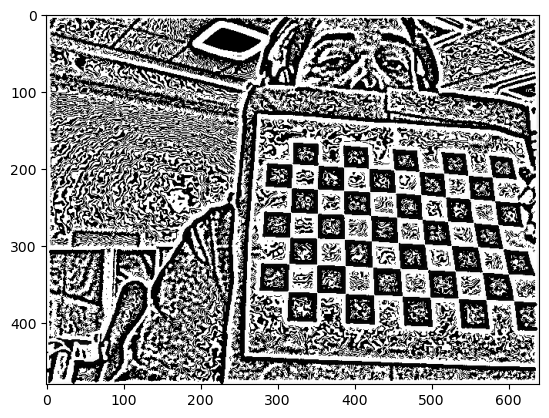

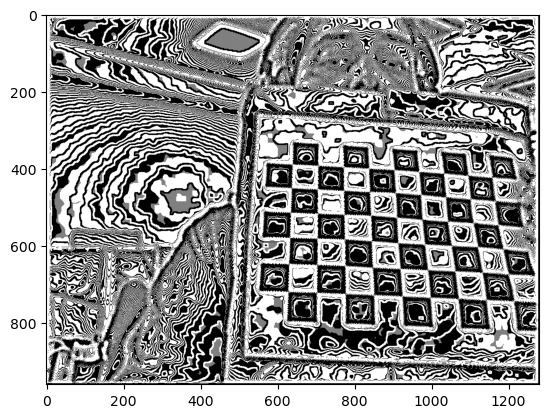

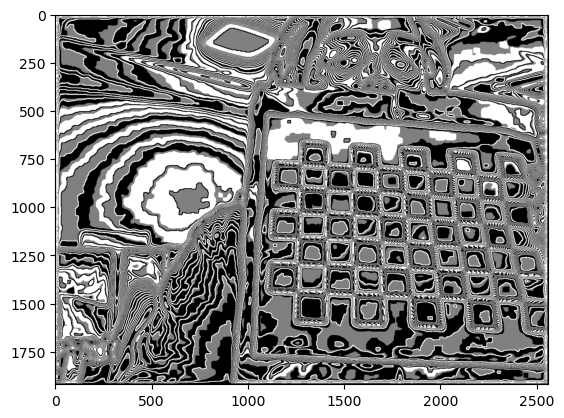

In [54]:
for i in range(len(dog)):
    plt.imshow(dog[i], cmap='gray')
    plt.show()

In [2]:
len(dog[0][0])

640

In [3]:
np.shape(dog[1])

(480, 640)

In [4]:
dog2 = [np.array(image) for image in dog] 

In [5]:
dog2 = np.array(dog2)

In [6]:
# dog2

In [7]:
np.shape(dog)

(9, 480, 640)

In [8]:
type(dog)


list

In [9]:

# for i in range(1, len(dog) - 1):
#      for j in range(1, len(dog[0]) - 1):
#          for k in range(1,len(dog[0][0])-1):
#             print(dog[i-1:i+2,j-1:j+2,k-1:k+2])
            # max_vaue=np.max(dog[i-1:i+2,j-1:j+2,k-1:k+2])

TypeError: list indices must be integers or slices, not tuple

In [27]:
def non_maximum_suppression(dog):
    suppressed = []
    # dog = [np.array(image) for image in dog]  
    for i in range(1, len(dog) - 1):
        for j in range(1, len(dog[0]) - 1):
            for k in range(1,len(dog[0][0])-1):
                max_vaue=np.max(dog[i-1:i+2,j-1:j+2,k-1:k+2])
                suppressed.append(np.where(dog[i,j,k] == max_vaue, dog[i,j,k], 0))

    return suppressed




suppressed_dog = non_maximum_suppression(dog2)


In [29]:
# for i in range(len(suppressed_dog)):
#     plt.imshow(suppressed_dog[i], cmap='gray')
#     plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 0

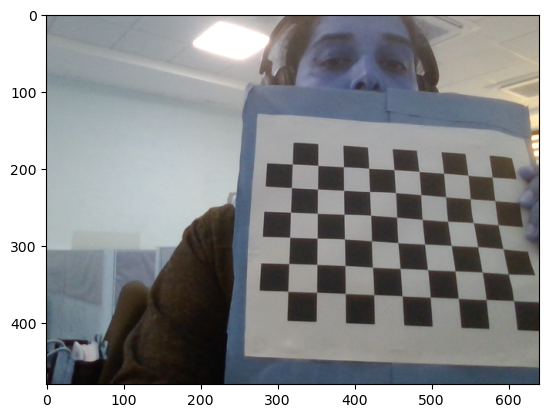

In [31]:

plt.imshow(img, cmap='gray')
non_zero_points = np.argwhere(suppressed_dog[0] != 0)
plt.scatter(non_zero_points[:, 1], non_zero_points[:, 0], s=1)
plt.show()

In [30]:
print(len(dog),len(image),k)

9 10 10


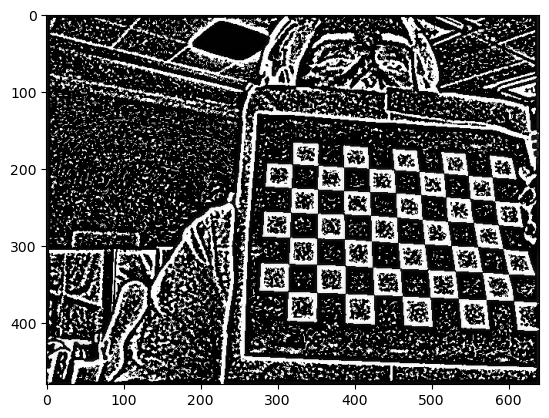

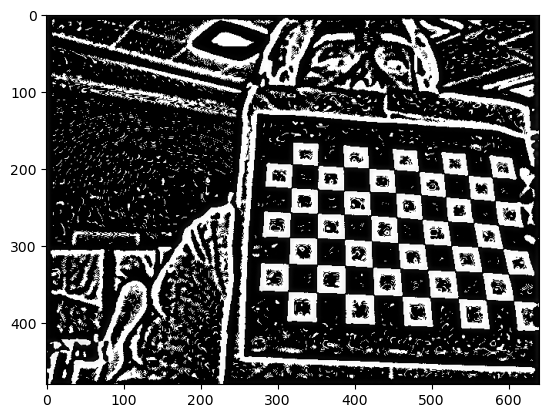

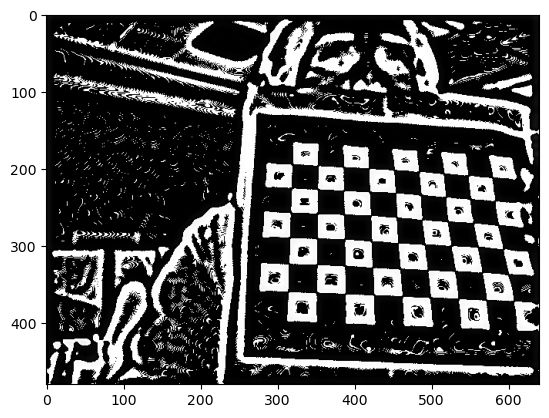

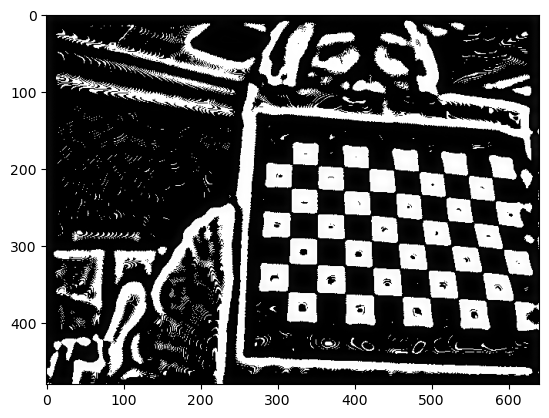

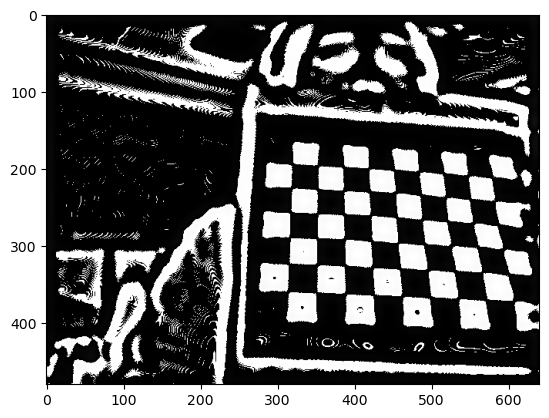

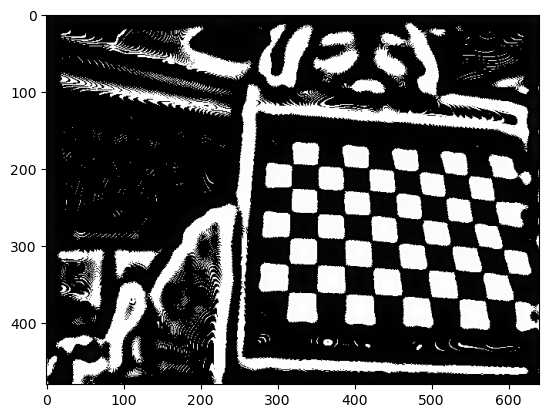

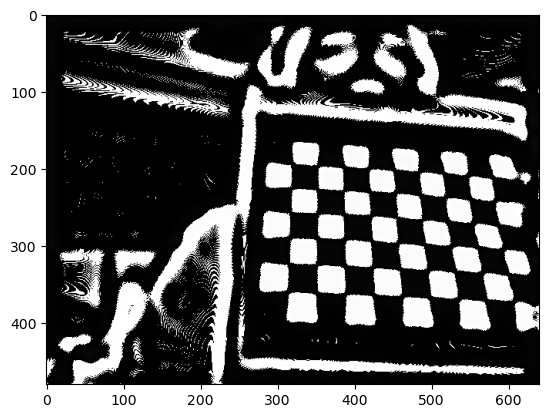

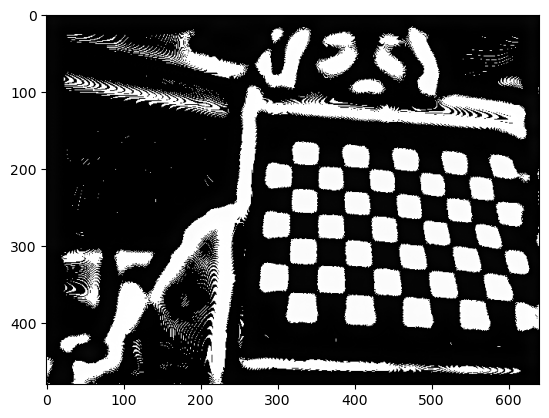

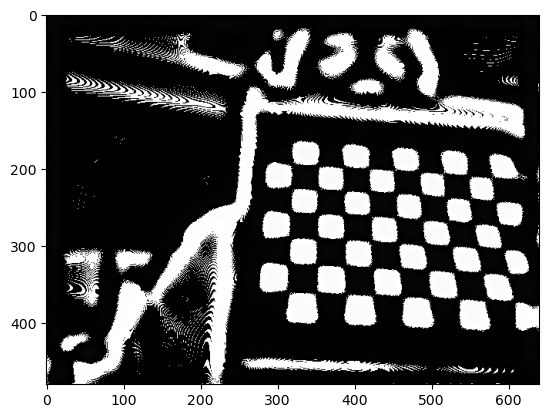

In [31]:
for i in range(len(dog)):
    plt.imshow(dog[i], cmap='gray')
    plt.show()